# Conociendo un poco el comportamiento del Ozono ($0_3$)

In [1]:
import pandas as pd
import altair as alt

In [2]:
# Cargar los datos
data = pd.read_csv(
    'http://www.aire.cdmx.gob.mx/opendata/anuales_horarios_gz/contaminantes_2021.csv.gz', 
    skiprows=10
)

In [3]:
data.head(15)

,date,id_station,id_parameter,value,unit
0,01/01/2021 01:00,ACO,CO,NaN,15
1,01/01/2021 01:00,ACO,NO,NaN,1
2,01/01/2021 01:00,ACO,NO2,NaN,1
3,01/01/2021 01:00,ACO,NOX,NaN,1
4,01/01/2021 01:00,ACO,O3,NaN,1
5,01/01/2021 01:00,ACO,PM10,33.0,2
6,01/01/2021 01:00,ACO,SO2,NaN,1
7,01/01/2021 01:00,AJU,O3,24.0,1
8,01/01/2021 01:00,AJU,PM2.5,NaN,2
9,01/01/2021 01:00,ATI,CO,0.3,15


In [4]:
d = data['date']
pd.to_datetime(d, format='%d/%m/%Y %H:%M')

ValueError: ignored

In [5]:
def fix_24hr(dt):
    dt_fix = dt[:-5] + '00' + dt[-3:]
    return dt_fix

In [6]:
data['date'] = pd.to_datetime(
    d.where(~d.str.contains('24:00'), lambda x: x.apply(fix_24hr)), 
    format='%d/%m/%Y %H:%M')

In [7]:
data.head(15)

,date,id_station,id_parameter,value,unit
0,2021-01-01 01:00:00,ACO,CO,NaN,15
1,2021-01-01 01:00:00,ACO,NO,NaN,1
2,2021-01-01 01:00:00,ACO,NO2,NaN,1
3,2021-01-01 01:00:00,ACO,NOX,NaN,1
4,2021-01-01 01:00:00,ACO,O3,NaN,1
5,2021-01-01 01:00:00,ACO,PM10,33.0,2
6,2021-01-01 01:00:00,ACO,SO2,NaN,1
7,2021-01-01 01:00:00,AJU,O3,24.0,1
8,2021-01-01 01:00:00,AJU,PM2.5,NaN,2
9,2021-01-01 01:00:00,ATI,CO,0.3,15


In [8]:
data.dtypes

date            datetime64[ns]
id_station              object
id_parameter            object
value                  float64
unit                     int64
dtype: object

In [31]:
PED_O3_march_data = data[
    (data['id_station'] == 'PED') &
    (data['id_parameter'] == 'O3') &
    (data['date'].dt.month == 8)
]
PED_O3_march_data.head(5)

,date,id_station,id_parameter,value,unit
1331753,2021-08-01 01:00:00,PED,O3,7.0,1
1332015,2021-08-01 02:00:00,PED,O3,10.0,1
1332277,2021-08-01 03:00:00,PED,O3,12.0,1
1332539,2021-08-01 04:00:00,PED,O3,7.0,1
1332801,2021-08-01 05:00:00,PED,O3,5.0,1


In [32]:
chart = alt.Chart(PED_O3_march_data)

In [33]:
chart.mark_boxplot(extent='min-max').encode(x='value')

alt.Chart(...)

In [34]:
p1 = chart.mark_point().encode(
    x='hours(date):T',
    y='value:Q',
    color='value:Q'
)

In [35]:
p2 = chart.mark_line(color='red').encode(
    x='hours(date):T',
    y='average(value):Q'
)

In [36]:
p3 = chart.mark_errorband(extent='stdev').encode(
    x='hours(date):T',
    y='value:Q'
)

In [41]:
p1 + p2 + p3 

alt.LayerChart(...)

# Scipy

Una biblioteca que extiende las funcionalidades de **Numpy** en cosas de cálculo numérico en algunos temas:

* Funciones especiales
* Integración
* Optimización
* Estadística
* Estructuras de datos
* Manejo de imágenes


## Balanceo de ecuaciones 

En un soplete se quema acetileno ($\textrm{C}_2\textrm{H}_2$) entonces la reacción que se lleva a cabo es:
$$
    \textrm{C}_2\textrm{H}_2 + \textrm{O}_2 \to 
        \textrm{CO}_2 + \textrm{H}_2\textrm{O}
$$
¿Cómo podemos balancear esta ecuación?

In [42]:
from scipy import linalg

In [43]:
import numpy as np

In [55]:
A = np.array([[1, 0, -3, 0], 
              [2, 4, -8, 1], 
              [2, 3, 0, -2], 
              [0, 1, -2, 0]], dtype='float64')

b = np.array([0, 0, 0, 0], dtype='float64')

In [45]:
?linalg.solve

In [56]:
res = linalg.solve(A, b)

In [57]:
res

array([ 0., -0.,  0., -0.])

## Modelando las temperaturas de Alaska en el año

Tenemos las temperaturas extremas, máximas y mínimas, de cada mes en Alaska.

Creemos que podemos modelar la temperatura a lo largo del año usando la formula

$$
    T(t) = \alpha + \omega\cos\left(\frac{2\pi(t+t_{\textrm{off}})}{12}\right)
$$

In [59]:
import numpy as np
import matplotlib.pyplot as plt

temp_max = np.array([17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18])
temp_min = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])

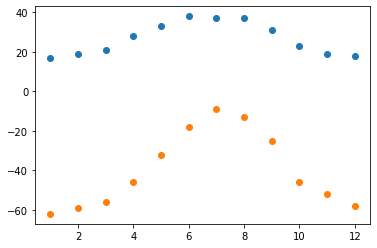

In [61]:
months = np.arange(1, 13)
plt.plot(months, temp_max, 'o')
plt.plot(months, temp_min, 'o')

In [62]:
from scipy import optimize

In [63]:
def year_temp(month, alpha, omega, time_off):
    return (alpha + omega*(np.cos((month+time_off)*2*np.pi/12)))

In [64]:
?optimize.curve_fit

In [70]:
max_params, max_cov = optimize.curve_fit(year_temp, months, temp_max)
min_params, min_cov = optimize.curve_fit(year_temp, months, temp_min)

In [66]:
max_params

array([26.75      , 10.93254953, 17.27651995])

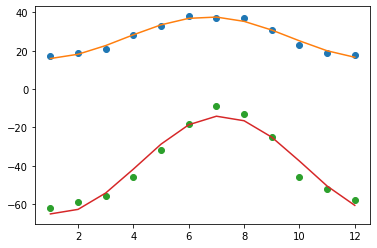

In [71]:
plt.plot(months, temp_max, 'o')
plt.plot(months, year_temp(months, *max_params))
plt.plot(months, temp_min, 'o')
plt.plot(months, year_temp(months, *min_params))

In [72]:
min_params

array([-39.66666667, -25.58169521,  46.84396351])

Además se tiene las funciones:

* `optimize.root`
* `optimize.minimize`

## Observando como crece una población

Verhulst en el siglo XIX propuso un modelo para ver la dinámica del crecimiento poblacional. El modelo lo podemos escribir de la siguiente manera

$$
\frac{\textrm{d}P}{\textrm{d}t} = r P \left(1-\frac{P}{K}\right) 
$$

In [73]:
from scipy import integrate

In [74]:
def logistic_model(pop, time):
    return 0.5*pop*(1-pop/10)

In [75]:
times = np.linspace(0, 20, num=100)
P = integrate.odeint(logistic_model, 2, times)

In [76]:
print(P)

[[2.        ]
 [2.16652067]
 [2.3428456 ]
 [2.52888819]
 [2.72444775]
 [2.92920088]
 [3.14269511]
 [3.36434601]
 [3.59343765]
 [3.82912717]
 [4.07045348]
 [4.31635065]
 [4.56566462]
 [4.81717395]
 [5.06961315]
 [5.32169788]
 [5.57215101]
 [5.81972834]
 [6.06324286]
 [6.30158669]
 [6.53374986]
 [6.75883515]
 [6.97606888]
 [7.1848073 ]
 [7.38453894]
 [7.57488311]
 [7.75558497]
 [7.92650792]
 [8.08762391]
 [8.23900206]
 [8.38079658]
 [8.51323419]
 [8.6366017 ]
 [8.75123411]
 [8.85750338]
 [8.95580826]
 [9.04656509]
 [9.13019983]
 [9.20714115]
 [9.27781472]
 [9.34263838]
 [9.40201848]
 [9.45634683]
 [9.50599864]
 [9.5513309 ]
 [9.59268148]
 [9.63036855]
 [9.66469053]
 [9.69592617]
 [9.72433506]
 [9.75015817]
 [9.7736186 ]
 [9.7949224 ]
 [9.81425949]
 [9.83180456]
 [9.84771804]
 [9.86214701]
 [9.87522613]
 [9.88707855]
 [9.89781674]
 [9.90754334]
 [9.91635192]
 [9.92432769]
 [9.93154822]
 [9.93808408]
 [9.94399941]
 [9.94935248]
 [9.95419621]
 [9.95857863]
 [9.96254333]
 [9.96612983]
 [9.96

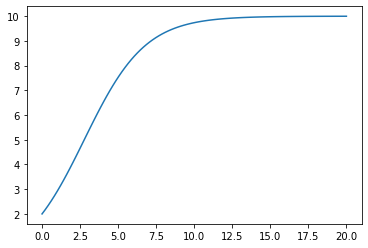

In [78]:
plt.plot(times, P)

Algunas otras funciones interesantes:

* `integrate.quad`
* `integrate.dblquad`
* `integrate.tplquad`
* `integrate.trapezoid`